In [1]:
import os
import numpy as np

In [2]:
input_filenames = 'filenames.txt'

In [3]:
with(open(input_filenames)) as f:
    files = f.readlines()
files = [x.strip() for x in files]

if len(files) == 0:
    raise ValueError("No files provided!!")
print("Merging "+str(len(files))+" files")

Merging 6 files


In [4]:
files_to_load = [0,2,4]
data = []
for i in range(len(files_to_load)):
    data.append(np.load(files[files_to_load[i]]))
print(len(data))
data[1].files

3


['event_id',
 'root_file',
 'pid',
 'position',
 'direction',
 'energy',
 'digi_hit_pmt',
 'digi_hit_charge',
 'digi_hit_time',
 'digi_hit_trigger',
 'true_hit_pmt',
 'true_hit_time',
 'true_hit_pos',
 'true_hit_start_time',
 'true_hit_start_pos',
 'true_hit_parent',
 'track_id',
 'track_pid',
 'track_start_time',
 'track_energy',
 'track_start_position',
 'track_stop_position',
 'track_parent',
 'track_flag',
 'trigger_time']

In [5]:
image = np.zeros((len(data), 40, 40, 38))
hit_pmts = data[0]['digi_hit_pmt'][0]
charge = data[0]['digi_hit_charge'][0]
time = data[0]['digi_hit_time'][0]
print(hit_pmts.shape)
print(charge.shape)
print(time.shape) # 1575 pmts hit

(1575,)
(1575,)
(1575,)


In [6]:
csv_file = "PMT label - Sheet3.csv"
def GenMapping(csv_file):
    mPMT_to_index = {}
    with open(csv_file) as f:
        rows = f.readline().split(",")[1:]
        rows = [int(r.strip()) for r in rows]

        for line in f:
            line_split = line.split(",")
            col = int(line_split[0].strip())
            for row, value in zip(rows, line_split[1:]):
                value = value.strip()
                if value: # If the value is not empty
                    mPMT_to_index[int(value)] = [col, row]
    return mPMT_to_index

mPMT_to_index = GenMapping(csv_file)

In [7]:
for i in range(len(data)):
    curr_file_data = data[i]
    # Look at first event only
    hit_pmts = curr_file_data['digi_hit_pmt'][0]
    charge = curr_file_data['digi_hit_charge'][0]
    time = curr_file_data['digi_hit_time'][0]
    for j in range(len(hit_pmts)):
        hit_mpmt = hit_pmts[j] // 19
        pmt_channel = hit_pmts[j] % 19
        index = mPMT_to_index[hit_mpmt]
        image[i, index[0], index[1], pmt_channel] = charge[j]
        image[i, index[0], index[1], pmt_channel + 19] = time[j]

In [8]:
import matplotlib.pyplot as plt

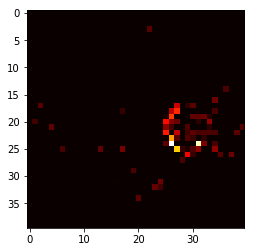

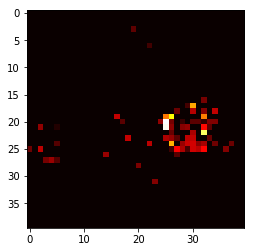

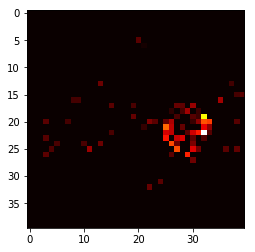

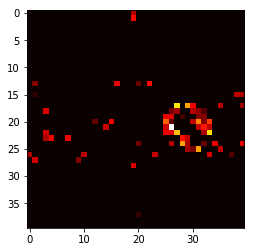

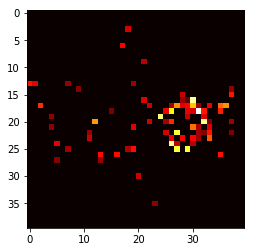

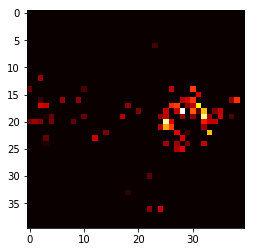

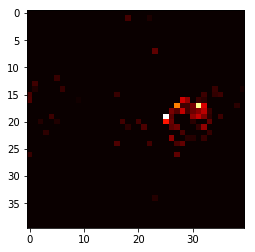

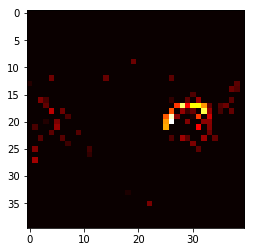

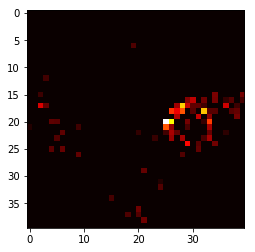

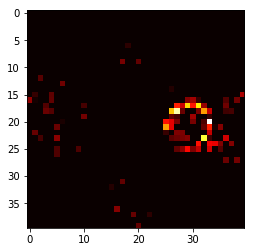

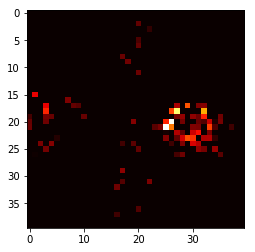

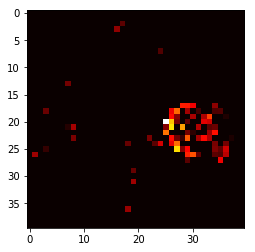

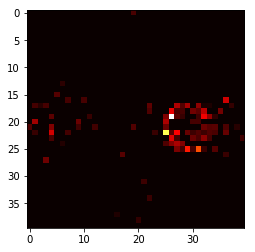

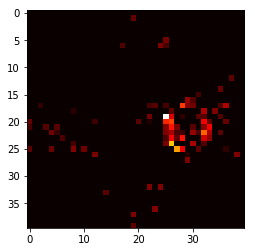

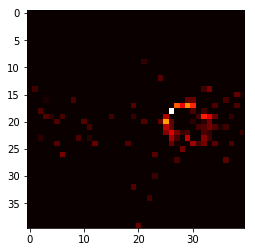

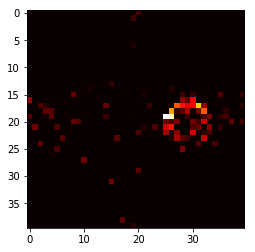

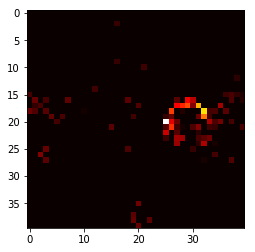

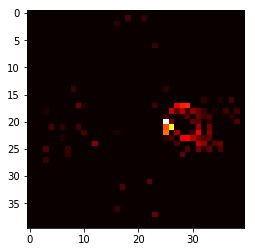

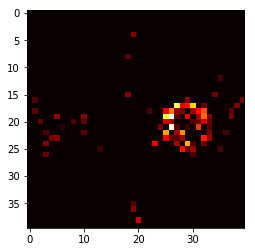

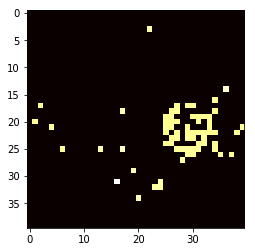

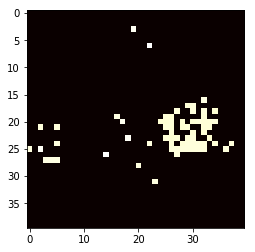

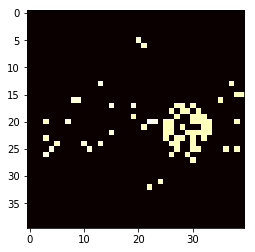

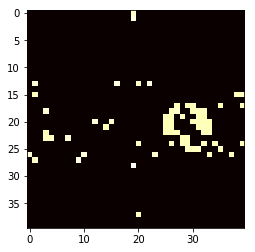

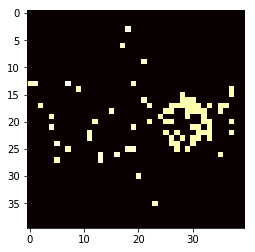

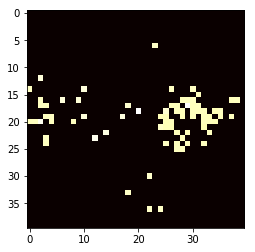

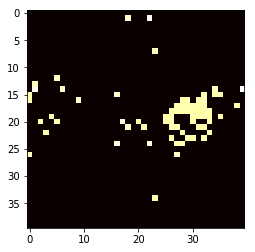

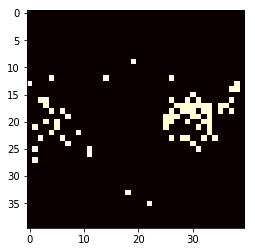

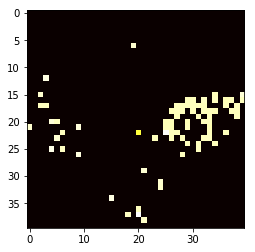

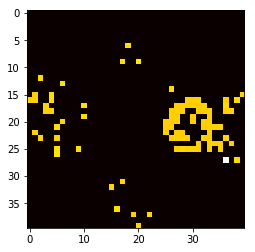

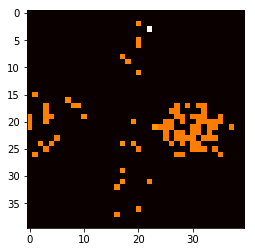

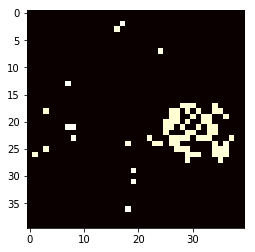

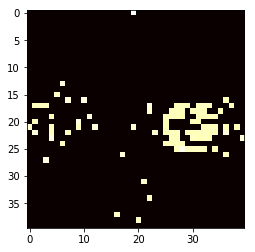

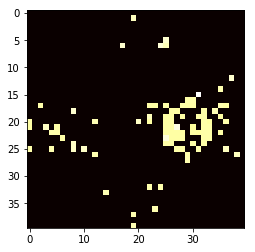

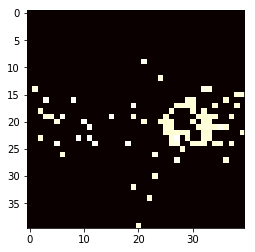

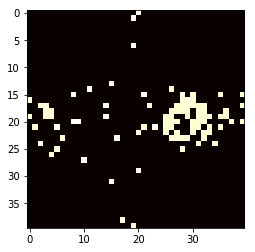

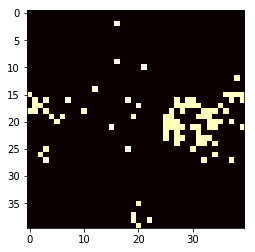

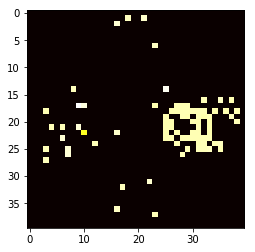

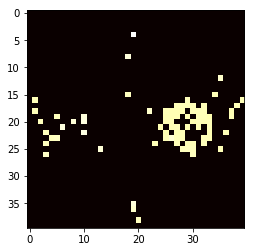

In [9]:
for i in range(19):
    plt.imshow(image[0,:,:,i], cmap='hot')
    plt.show()
for i in range(19):
    plt.imshow(image[0,:,:,i+19], cmap='hot')
    plt.show()

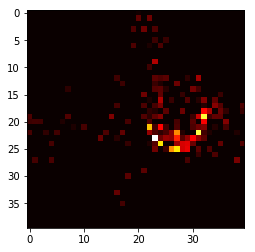

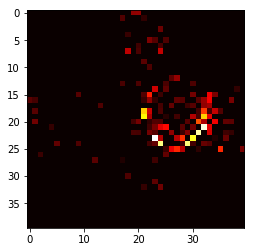

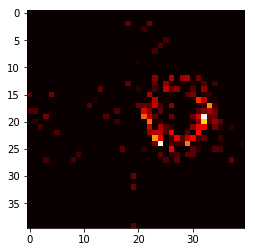

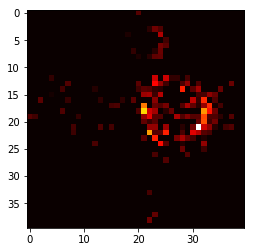

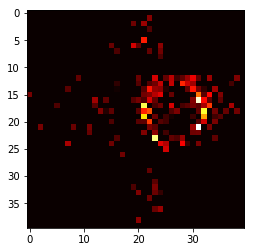

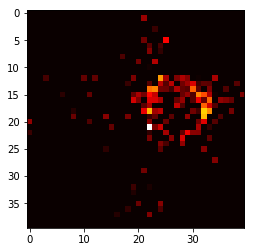

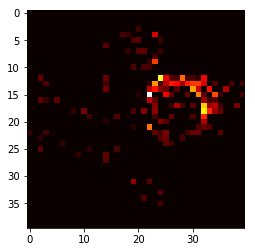

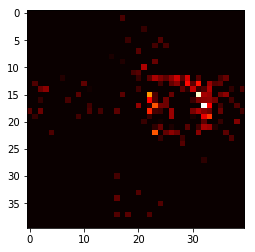

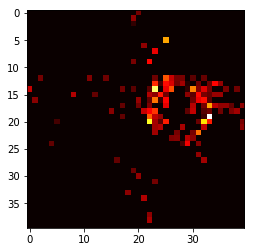

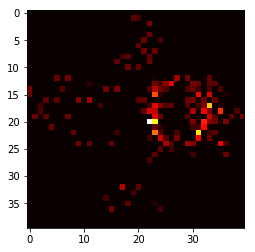

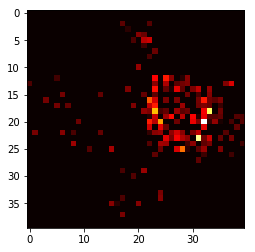

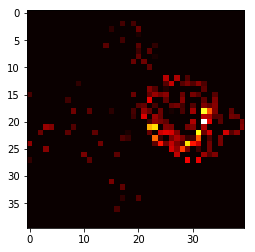

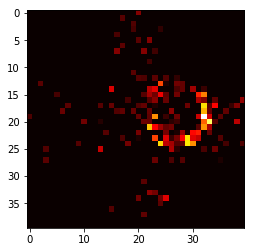

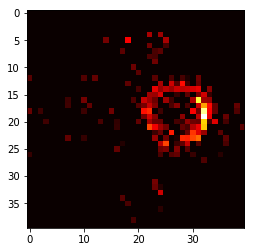

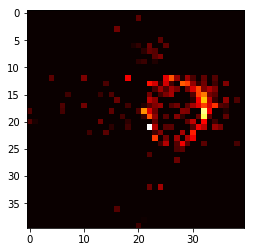

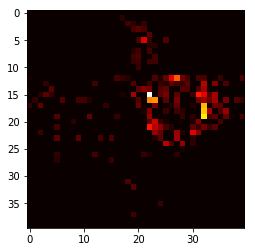

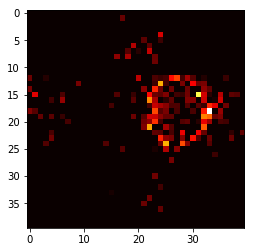

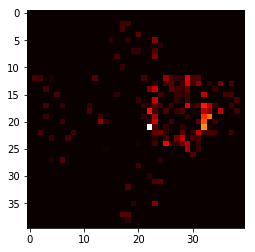

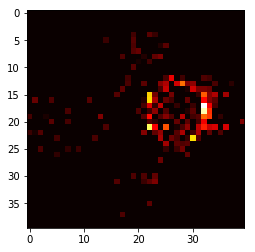

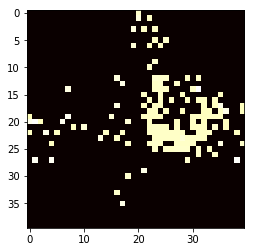

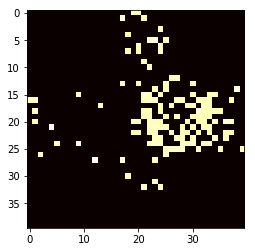

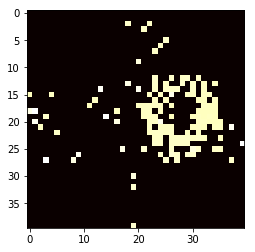

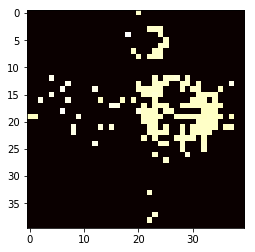

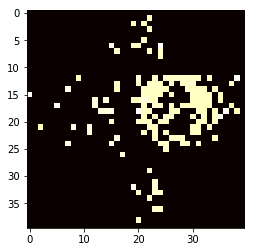

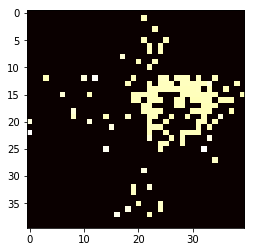

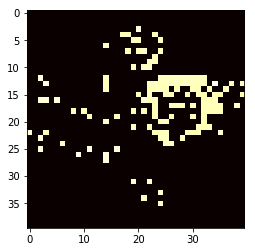

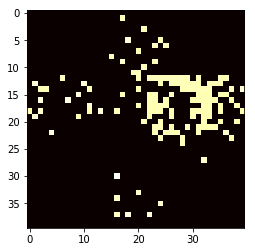

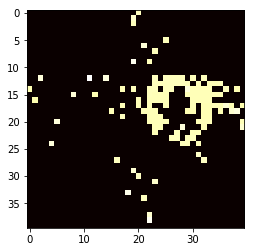

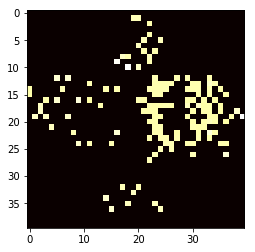

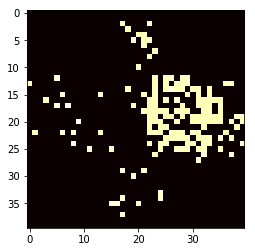

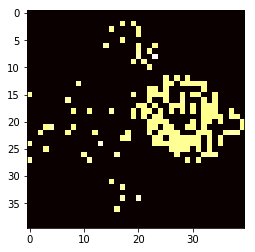

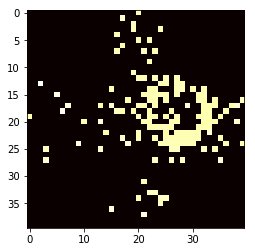

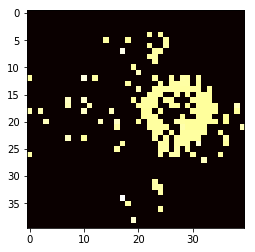

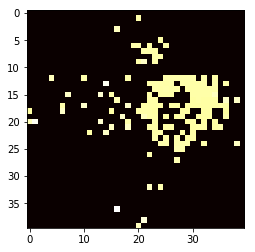

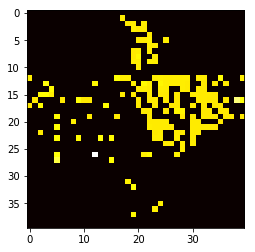

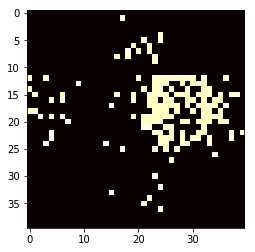

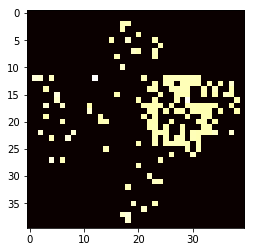

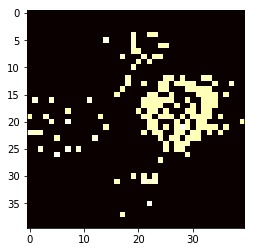

In [10]:
for i in range(19):
    plt.imshow(image[1,:,:,i], cmap='hot')
    plt.show()
for i in range(19):
    plt.imshow(image[1,:,:,i+19], cmap='hot')
    plt.show()

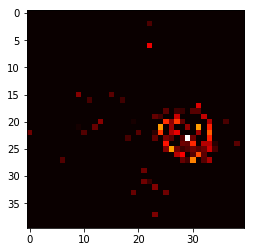

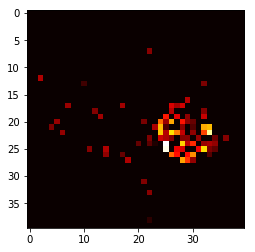

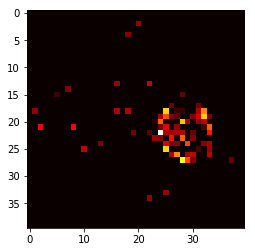

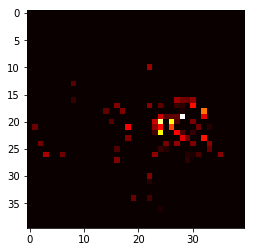

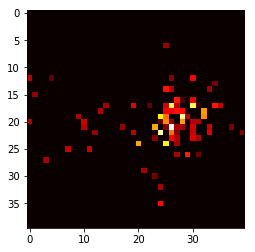

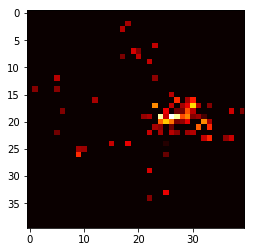

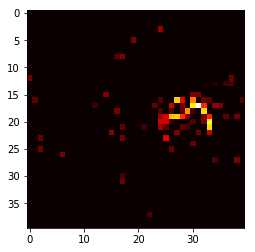

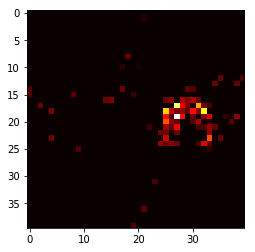

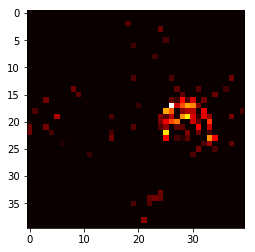

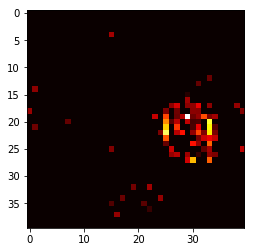

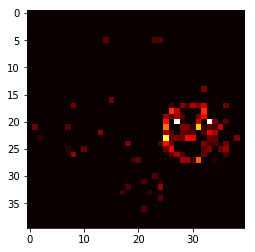

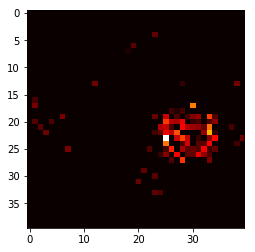

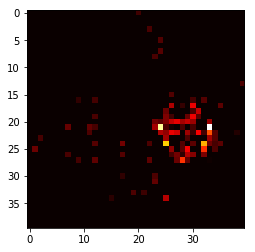

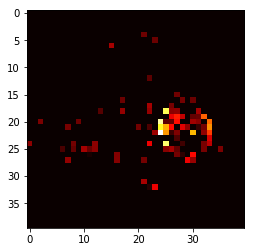

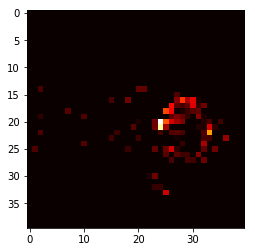

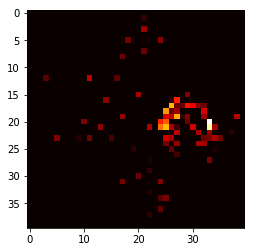

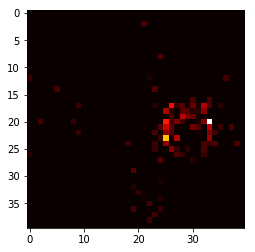

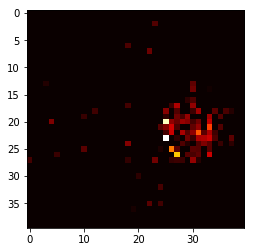

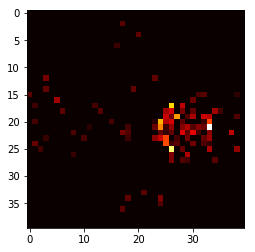

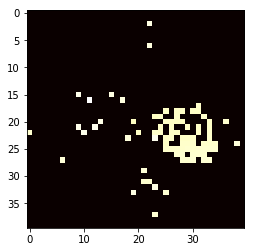

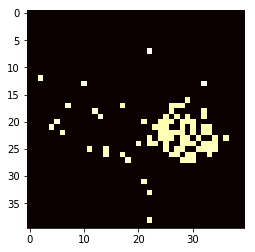

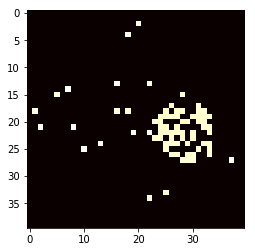

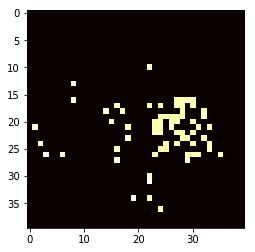

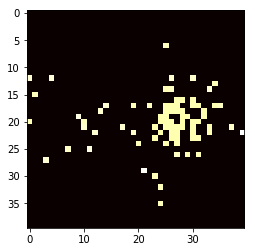

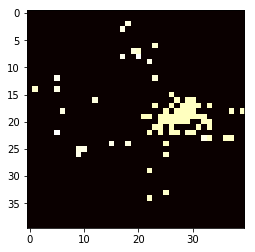

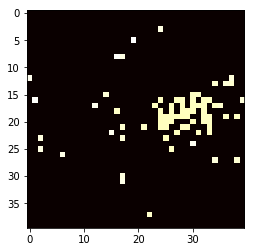

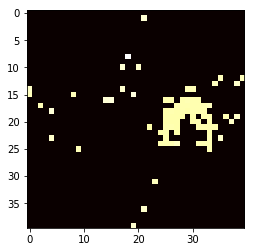

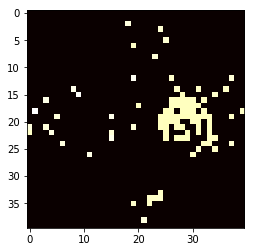

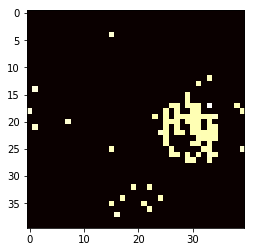

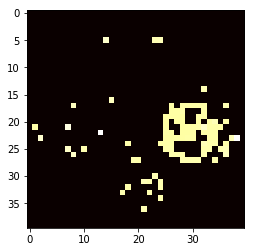

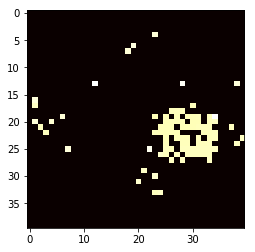

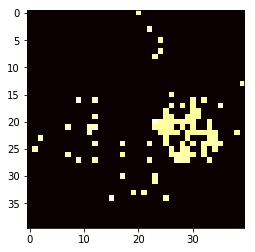

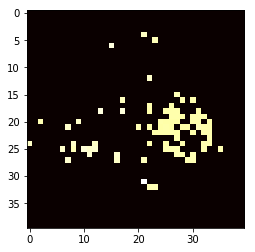

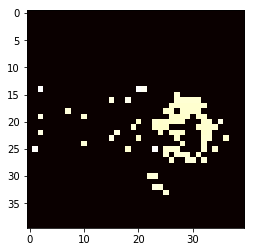

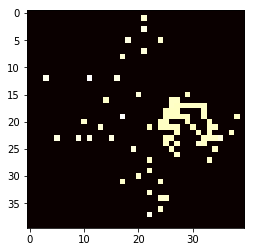

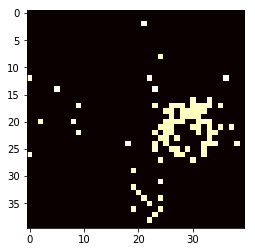

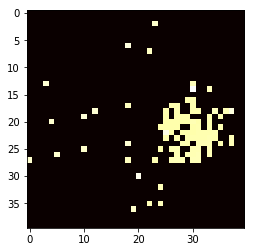

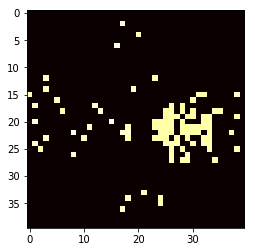

In [11]:
for i in range(19):
    plt.imshow(image[2,:,:,i], cmap='hot')
    plt.show()
for i in range(19):
    plt.imshow(image[2,:,:,i+19], cmap='hot')
    plt.show()

In [ ]:
#TODO: Visualization histogram of number of pmt hits